<ipython-input-18-851340b83b7f>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df_for_viz, palette=palette)
<ipython-input-18-851340b83b7f>:40: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x='Sex', y='Survived', data=df_for_viz, palette=palette)
<ipython-input-18-851340b83b7f>:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)  # Adjust the fontsize of the legend


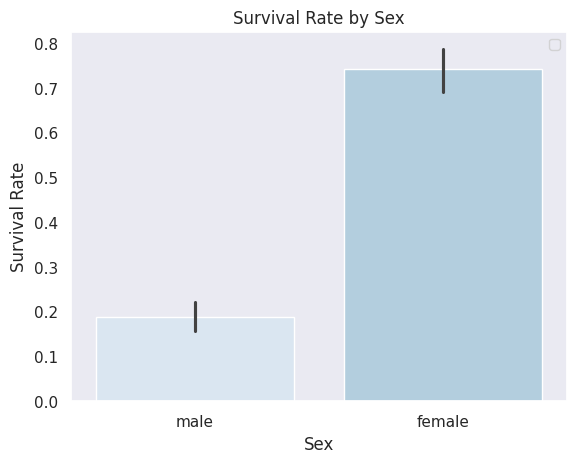

<ipython-input-18-851340b83b7f>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df_for_viz, palette=class_palette)  # Assuming 'Pclass' represents passenger class
<ipython-input-18-851340b83b7f>:49: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='Pclass', y='Survived', data=df_for_viz, palette=class_palette)  # Assuming 'Pclass' represents passenger class
<ipython-input-18-851340b83b7f>:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


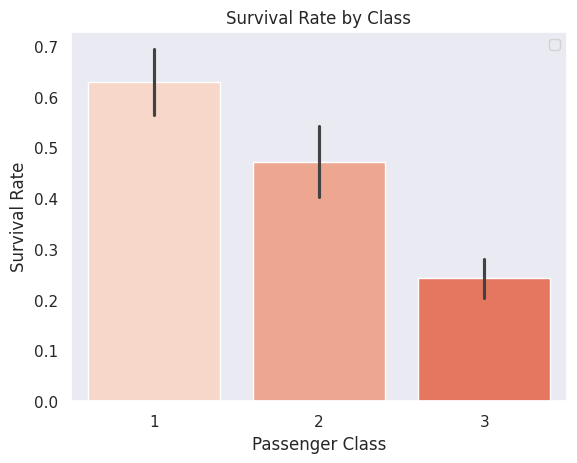

<ipython-input-18-851340b83b7f>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df_for_viz,palette=age_palette)
<ipython-input-18-851340b83b7f>:60: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x='AgeGroup', y='Survived', data=df_for_viz,palette=age_palette)
<ipython-input-18-851340b83b7f>:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


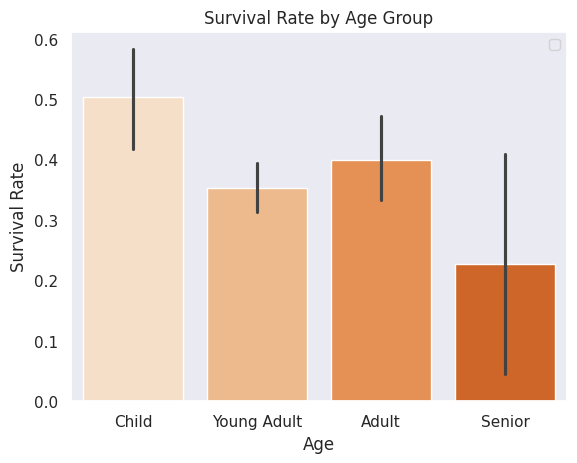

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.8044692737430168
Precision: 0.8095238095238095
Recall: 0.6891891891891891
F1 Score: 0.7445255474452555
Random Forest:
Accuracy: 0.8156424581005587
Precision: 0.8360655737704918
Recall: 0.6891891891891891
F1 Score: 0.7555555555555555


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
import zipfile
# Specify the path to the zip file
zip_file_path = '/content/archive.zip'

# Specify the name of the CSV file inside the zip
csv_file_name = 'Titanic-Dataset.csv'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Open the CSV file within the zip file
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(csv_file)
# Data Cleaning
# Convert 'Age' and any other relevant columns to numeric if they contain strings
# Only calculate the mean for numeric columns
numeric_df = df.select_dtypes(include=np.number)
df.fillna(numeric_df.mean(), inplace=True)


# Create a copy of the DataFrame before applying get_dummies
df_for_viz = df.copy()

# Apply get_dummies to thhttps://colab.research.google.com/drive/1YIRRckuqZ1_fNgctCLuXLr8RnhL2rtVH#scrollTo=VORNwUsN72jv&line=11&uniqifier=1e original DataFrame
df = pd.get_dummies(df, drop_first=True)

# EDA
# Survival by Sex
sns.set_theme(style="dark")
palette = sns.color_palette("Blues", n_colors=5)
sns.barplot(x='Sex', y='Survived', data=df_for_viz, palette=palette)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.legend(fontsize=10)  # Adjust the fontsize of the legend
plt.show()
# Survival by Class
sns.set_theme(style="dark")
class_palette = sns.color_palette("Reds", n_colors=5)
sns.barplot(x='Pclass', y='Survived', data=df_for_viz, palette=class_palette)  # Assuming 'Pclass' represents passenger class
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(fontsize=10)
plt.show()
#Survival by Age
sns.set_theme(style="dark")
age_palette = sns.color_palette("Oranges", n_colors=5)
df_for_viz['AgeGroup'] = pd.cut(df_for_viz['Age'], bins=[0, 18, 35, 60, 100],
                                 labels=['Child', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='AgeGroup', y='Survived', data=df_for_viz,palette=age_palette)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.legend(fontsize=10)
plt.show()

# Model Training
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print('Precision:', precision_score(y_test, y_pred_log_reg))
print('Recall:', recall_score(y_test, y_pred_log_reg))
print('F1 Score:', f1_score(y_test, y_pred_log_reg))

print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))

In [ ]:
import zipfile
# Specify the path to the zip file
zip_file_path = '/content/archive.zip'

# Specify the name of the CSV file inside the zip
csv_file_name = 'Titanic-Dataset.csv'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Open the CSV file within the zip file
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(csv_file)